In [61]:
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import numpy as np 
import numpy.random as npr
import statsmodels.api as sm

ssm = sm.tsa.MarkovAutoregression

In [46]:
def generate_data(num_regimes: int, num_sections: int = 10) -> np.ndarray: 
    frequencies: np.ndarray = npr.randint(1, 10, size=(num_regimes))
    observations = [] 
    noise_scale: float = 1e-1

    for _ in range(num_sections): 
        frequency: int = npr.choice(frequencies)
        length: int = npr.randint(25, 100)
        noise: np.ndarray = noise_scale * npr.randn(length)
        t: np.ndarray = np.linspace(0.0, 2.0 * np.pi, num=length)
        observations.append(np.sin(frequency * t) + noise)

    return np.concatenate(observations)

In [19]:
T: int = 100
t: np.ndarray = np.linspace(0.0, 2.0 * np.pi, num=T)
x1: np.ndarray = np.sin(3.0 * t)
x2: np.ndarray = np.sin(10.0 * t)
x3: np.ndarray = np.sin(5.0 * t)
noise_scale: float = 1e-1
x: np.ndarray = np.concatenate([x1, x2, x3]) + noise_scale * npr.randn(T*3)

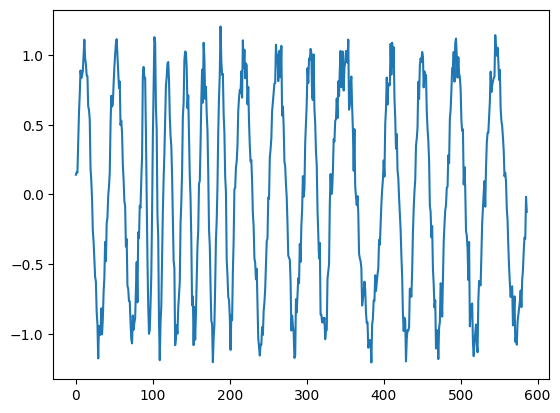

In [53]:
%matplotlib inline 
x = generate_data(3)
plt.figure() 
plt.plot( x, c="tab:blue")
plt.show()


In [54]:
model = ssm(x, k_regimes=3, order=5, switching_ar=True)

In [55]:
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                        y   No. Observations:                  582
Model:             MarkovAutoregression   Log Likelihood                 282.253
Date:                  Thu, 27 Jul 2023   AIC                           -514.507
Time:                          22:06:15   BIC                           -405.345
Sample:                               0   HQIC                          -471.955
                                  - 582                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0149      0.098     -0.152      0.879      -0.207       0.177
ar.L1          1.2747      0.103     12.328      0.000       1.072       1.477
ar.L2         -0.0104      0.194     -0.054      0.957      -0.391       0.370
ar.L3         -0.0119      0.195     -0.061      0.951      -0.394       0.370
ar.L4         -0.8132      0.152     -5.336      0.000      -1.112      -0.515
ar.L5          0.4146      0.118      3.528      0.000       0.184       0.645
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1225      0.061     -2.002      0.045      -0.243      -0.003
ar.L1          0.6336      0.138      4.586      0.000       0.363       0.904
ar.L2          0.3623      0.185      1.962      0.050       0.000       0.724
ar.L3          0.4539      0.236      1.920      0.055      -0.009       0.917
ar.L4          0.0600      0.210      0.285      0.776      -0.353       0.473
ar.L5         -0.6005      0.144     -4.162      0.000      -0.883      -0.318
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0408      0.060      0.682      0.496      -0.077       0.158
ar.L1          0.9894      0.100      9.892      0.000       0.793       1.185
ar.L2          0.2124      0.153      1.387      0.166      -0.088       0.513
ar.L3         -0.1092      0.107     -1.022      0.307      -0.319       0.100
ar.L4          0.2802      0.136      2.059      0.040       0.013       0.547
ar.L5         -0.4431      0.070     -6.367      0.000      -0.579      -0.307
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0119      0.001      9.673      0.000       0.010       0.014
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9144      0.360      2.543      0.011       0.210       1.619
p[1->0]        0.0410      0.052      0.785      0.432      -0.

In [39]:
results.filtered_marginal_probabilities.shape

(598, 3)

In [44]:
smooth: callable = lambda x, order=10: np.convolve(np.ones(order) / order, x, mode='same')

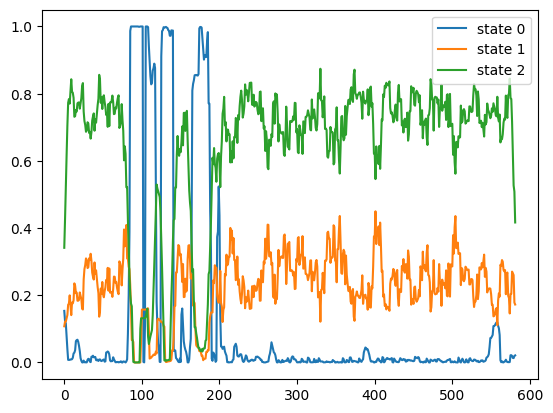

In [57]:
plt.figure()
plt.plot(results.smoothed_marginal_probabilities[:, 0], label="state 0")
plt.plot(smooth(results.smoothed_marginal_probabilities[:, 1]), label="state 1")
plt.plot(smooth(results.smoothed_marginal_probabilities[:, 2]), label="state 2")
plt.legend()

In [59]:
marginals = results.filtered_marginal_probabilities 
marginals.argmax(axis=1) 

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,

/tmp/ipykernel_151576/306378922.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("jet")


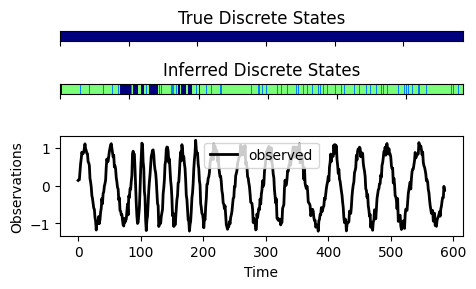

In [66]:
from matplotlib.cm import get_cmap
colors = ['b', 'r', 'y', 'g', 'purple']
cmap = get_cmap("jet")

def display_results(x: np.ndarray, marginals: np.ndarray): 
    global colors
    fig = plt.figure(figsize=(5,3))
    gs = GridSpec(3, 1, height_ratios=[.1, .1, 1.0])
    ax = fig.add_subplot(gs[0,0])
    ax.imshow(np.zeros_like(x)[None, :], vmin=0, vmax=max(len(colors), 3)-1,
            cmap=cmap, interpolation="nearest", aspect="auto")
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_title("True Discrete States")

    ax = fig.add_subplot(gs[1,0])
    ax.imshow(marginals.argmax(axis=1)[None, :], vmin=0, vmax=max(len(colors), 3)-1, cmap=cmap, interpolation="nearest", aspect="auto")
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_title("Inferred Discrete States")

    ax = fig.add_subplot(gs[2,0])
    plt.plot(x, color='k', lw=2, label="observed")
    plt.xlabel("Time")
    plt.ylabel("Observations")
    plt.legend(loc="upper center", ncol=2)
    plt.tight_layout()
    plt.show()

display_results(x, marginals)